In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pystan
import seaborn as sns
from sklearn.linear_model import LogisticRegression

plt.rcParams['font.size'] = 12

In [3]:
X = 4 * np.array(
    [
        [ 0.21, -0.37],
        [-1.16, -1.02],
        [ 0.33, -1.91],
        [-0.76, -1.66],
        [-2.2 , -2.62],
        [-0.21,  0.37],
        [ 1.16,  1.02],
        [-0.33,  1.91],
        [ 0.76,  1.66],
        [ 2.2 ,  2.62],
    ],
)


In [4]:
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])


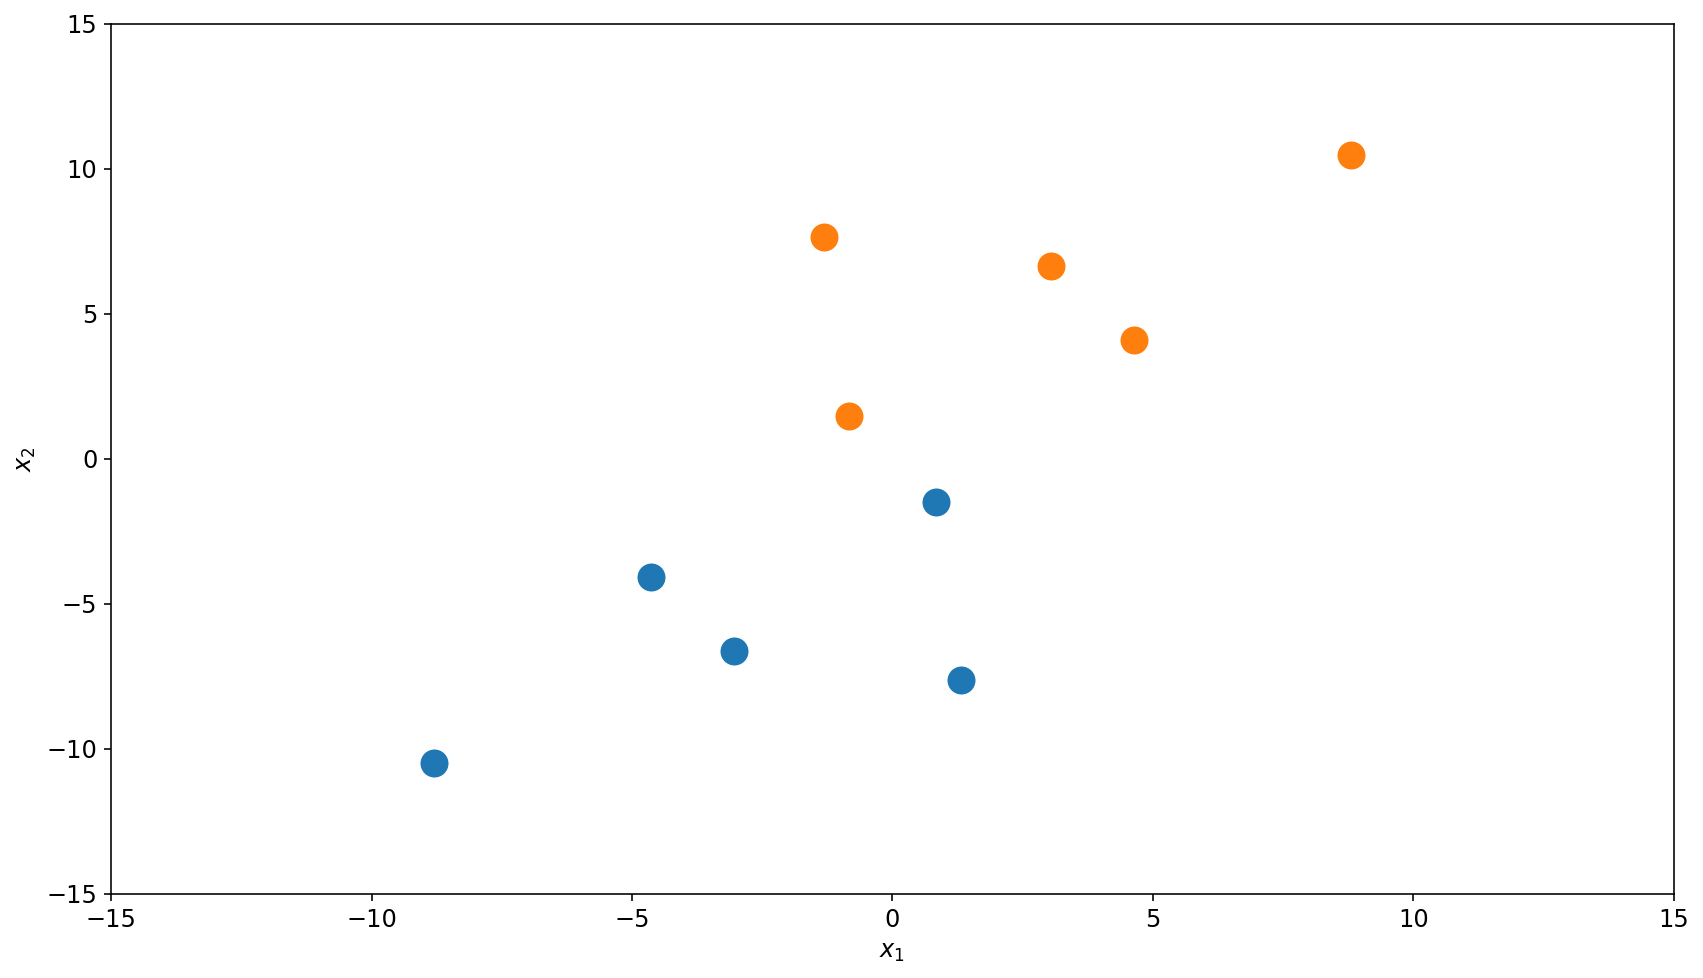

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))
# contour = ax.contourf(X1, X2, clf_probas, cmap=cmap)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
# cbar = plt.colorbar(contour, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')
ax.set_ylim([-15, 15])
ax.set_xlim([-15, 15])
# cbar.ax.set_ylabel('Probability of $y=1$')
plt.show()
# plt.plot(*X[:5].T, 'o')
# plt.plot(*X[5:].T, 'x')


In [6]:
clf = LogisticRegression(solver="lbfgs", penalty='none')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
print(clf.coef_)

[[-2.14933281  6.03934423]]


In [8]:
clf.intercept_

array([0.])

In [9]:
X1, X2 = np.meshgrid(np.linspace(-15, 15), np.linspace(-15, 15))
grid = np.c_[X1.ravel(), X2.ravel()]

clf_probas1 = clf.predict_proba(grid)[:, 1].reshape(X1.shape)


In [10]:
import seaborn as sns


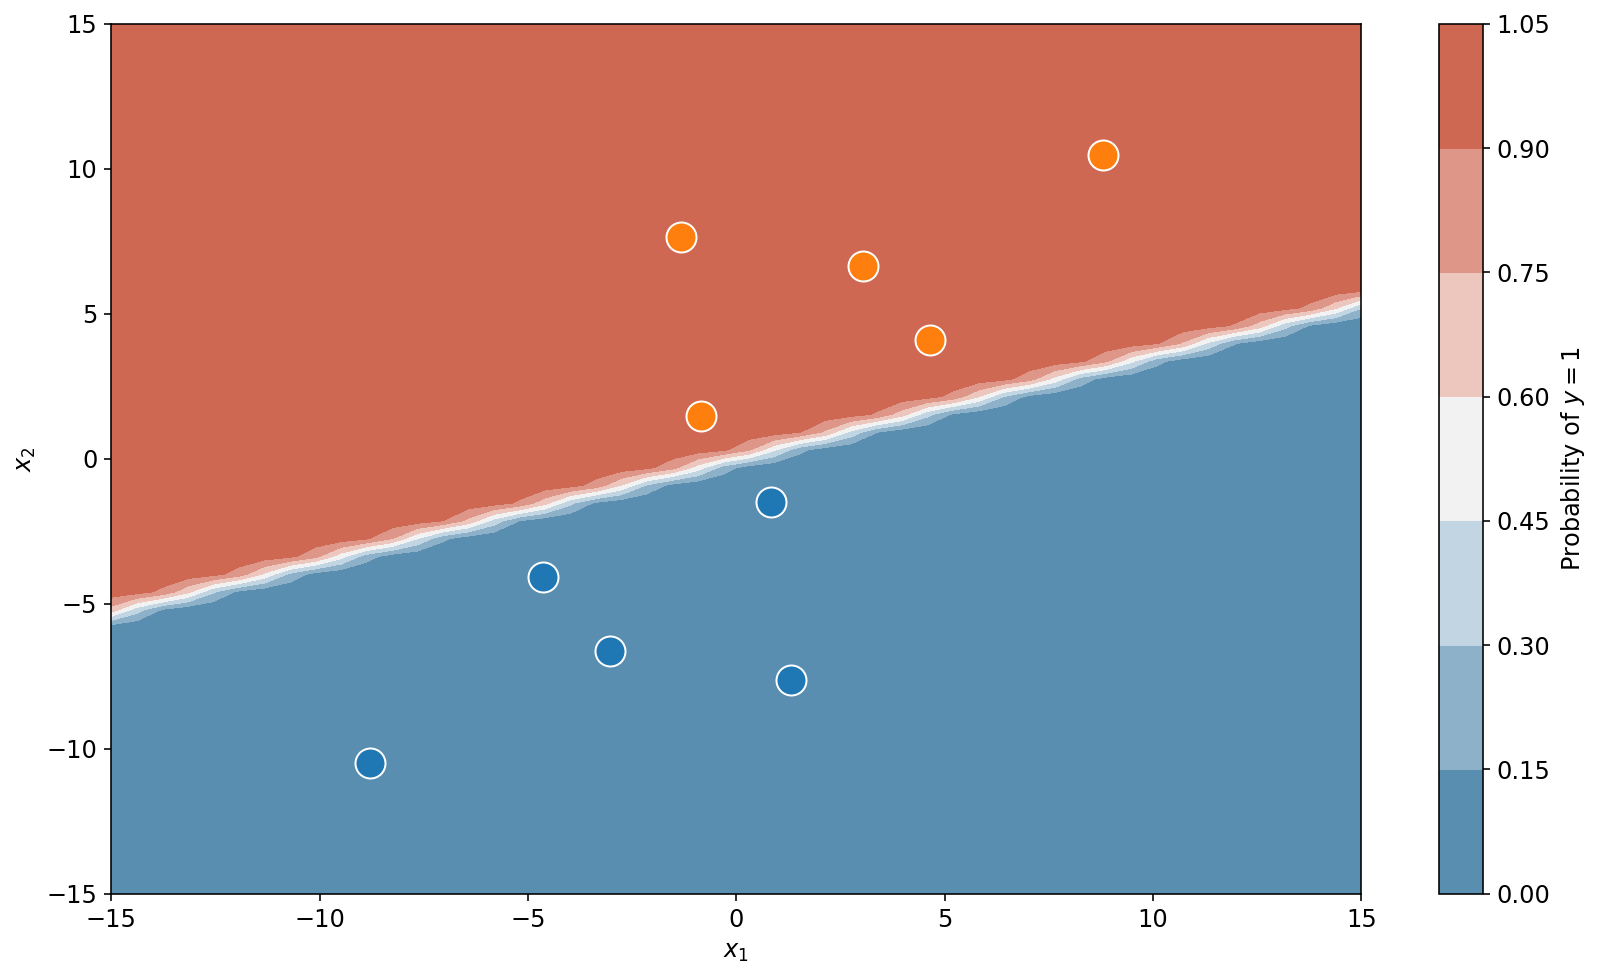

In [11]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(X1, X2, clf_probas1, cmap=cmap)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
cbar = plt.colorbar(contour, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')
cbar.ax.set_ylabel('Probability of $y=1$')
plt.show()


## With regularisation

In [12]:
clf = LogisticRegression(penalty='l1')
clf.fit(X, y)
print(clf.coef_)

[[0.         0.83888744]]


/Users/omarfsosa/anaconda3/envs/stan/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
clf.intercept_

array([0.])

In [14]:
clf_probas = clf.predict_proba(grid)[:, 1].reshape(X1.shape)

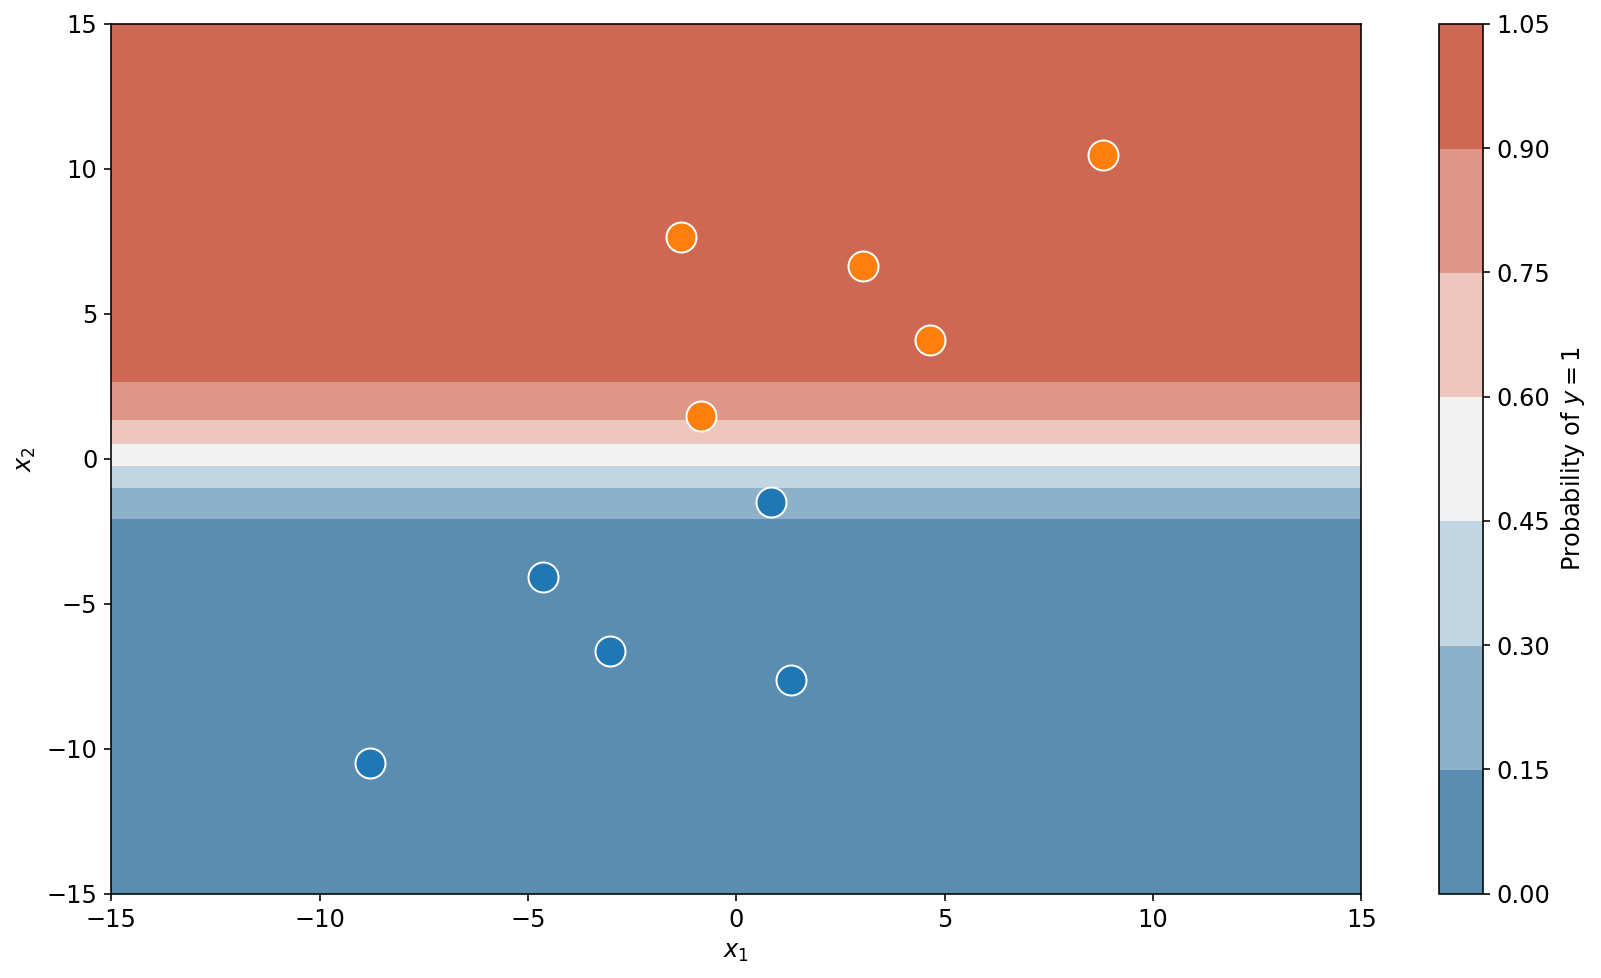

In [15]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(X1, X2, clf_probas, cmap=cmap)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
cbar = plt.colorbar(contour, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')
cbar.ax.set_ylabel('Probability of $y=1$')
plt.show()


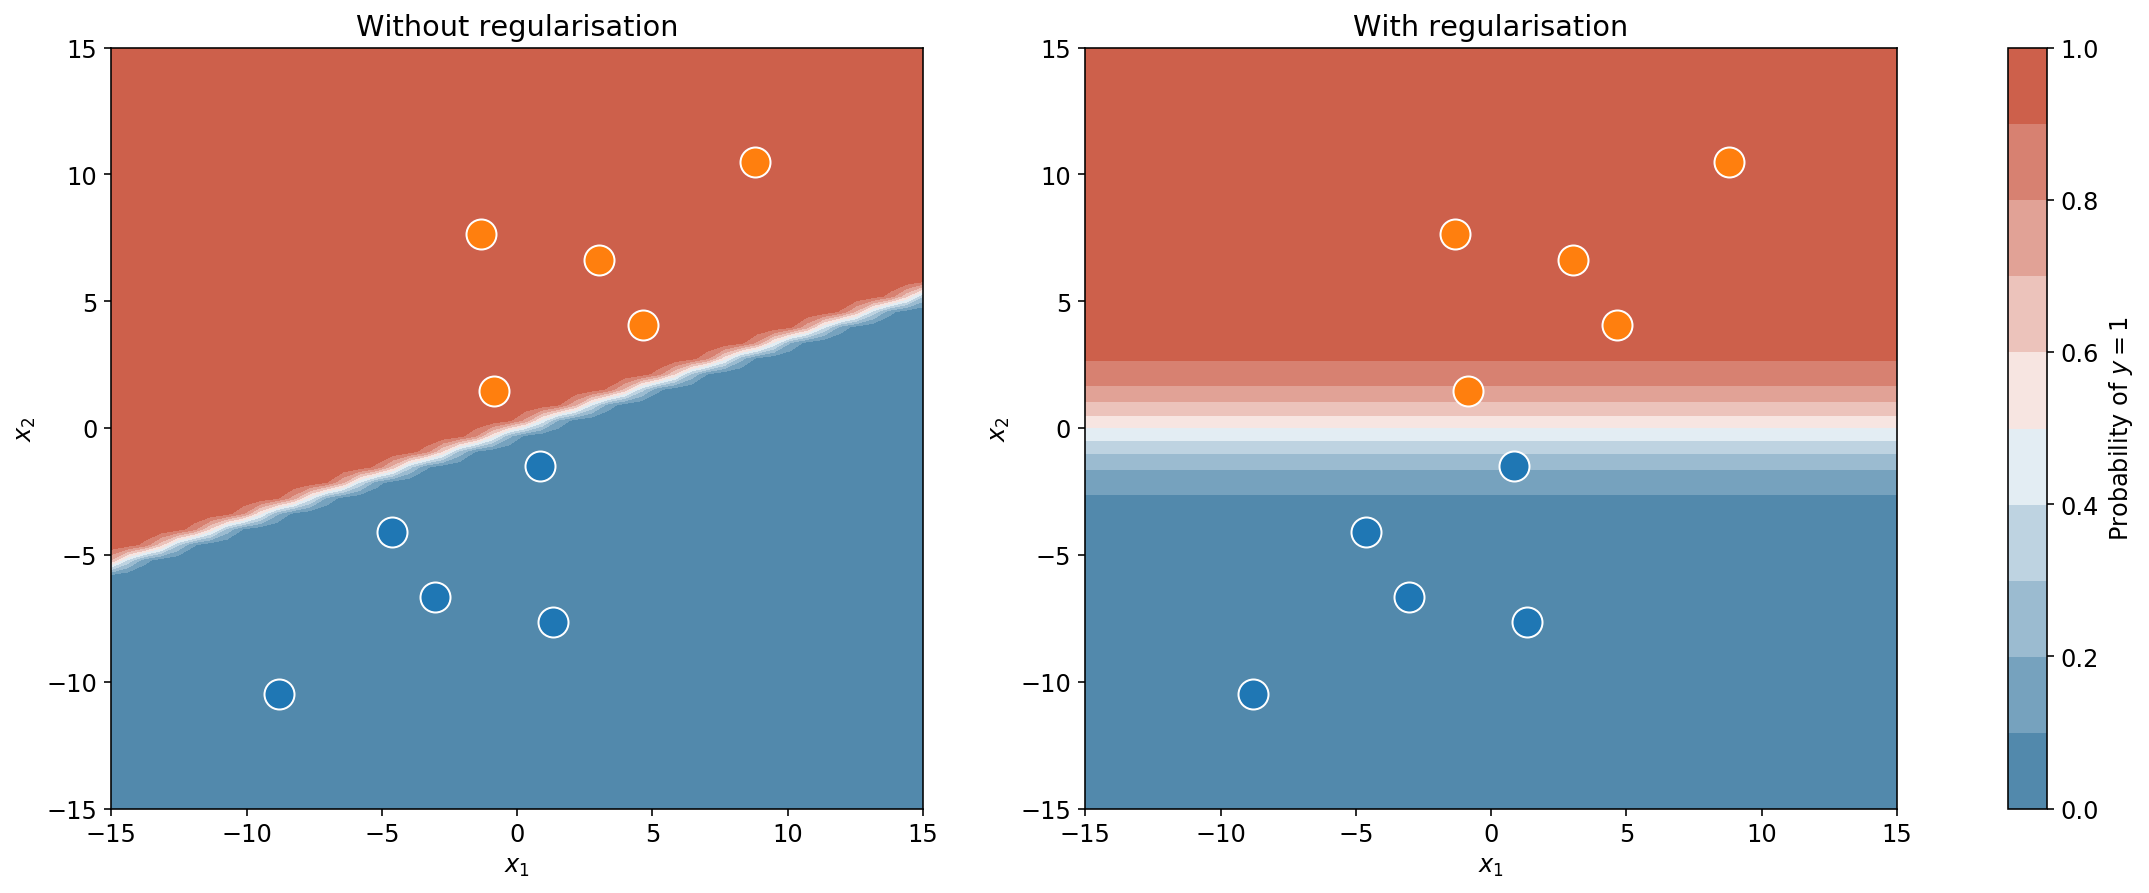

In [16]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

contour = axes[1].contourf(X1, X2, clf_probas, cmap=cmap, levels=9)
axes[1].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
axes[1].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
# cbar = plt.colorbar(contour, ax=axes[1])
axes[1].set(xlabel='$x_1$', ylabel='$x_2$')
axes[1].set_title("With regularisation")
# cbar.ax.set_ylabel('Probability of $y=1$')

contour = axes[0].contourf(X1, X2, clf_probas1, cmap=cmap, vmin=0, vmax=1, levels=9)
axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
# cbar = plt.colorbar(contour, ax=axes[1])
axes[0].set(xlabel='$x_1$', ylabel='$x_2$')
axes[0].set_title("Without regularisation")
# cbar.ax.set_ylabel('Probability of $y=1$')

cbar = fig.colorbar(contour, ax=axes.ravel().tolist())
cbar.ax.set_ylabel('Probability of $y=1$')

plt.show()

In [17]:
import pystan

In [18]:
logistic_regression_code = """
data {
    int N;
    int D;
    matrix[N, D] X;
    int y[N];
}

parameters {
    vector[D] beta;
}

model {
    beta ~ normal(0, 1);
    y ~ bernoulli_logit(X*beta);
}
"""

In [19]:
bayes_logistic_regression = pystan.StanModel(model_code=logistic_regression_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_191ee5324203307ea28e32f41b4f0278 NOW.


In [20]:
data = {
    "N": X.shape[0],
    "D": X.shape[1],
    "X": X,
    "y": y,
}

In [21]:
samples = bayes_logistic_regression.sampling(data=data)

In [22]:
samples

Inference for Stan model: anon_model_191ee5324203307ea28e32f41b4f0278.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]   0.19    0.02   0.71  -1.08  -0.31   0.16   0.64   1.67   1649    1.0
beta[2]    1.3    0.02    0.6   0.34   0.87   1.24   1.68   2.67   1519    1.0
lp__     -1.92    0.03   0.97  -4.59  -2.32  -1.63  -1.23  -0.96   1335    1.0

Samples were drawn using NUTS at Sat Sep 19 12:53:50 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [23]:
beta_samples = samples.extract()['beta']

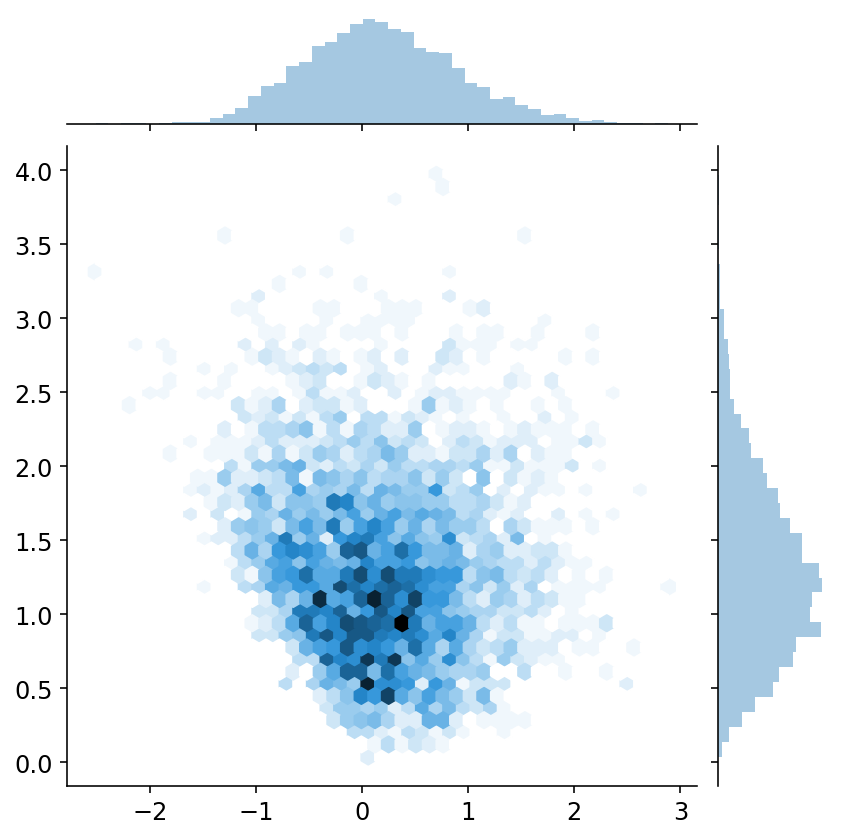

In [24]:
sns.jointplot(*beta_samples.T, kind='hex')

In [25]:
def logistic(x):
    """Inverse of the logit function."""
    return 1 / (1 + np.exp(-x))

In [42]:
n = 500
weights = beta_samples[:n]
probas = logistic(grid @ weights.T).mean(axis=1).reshape(X1.shape)

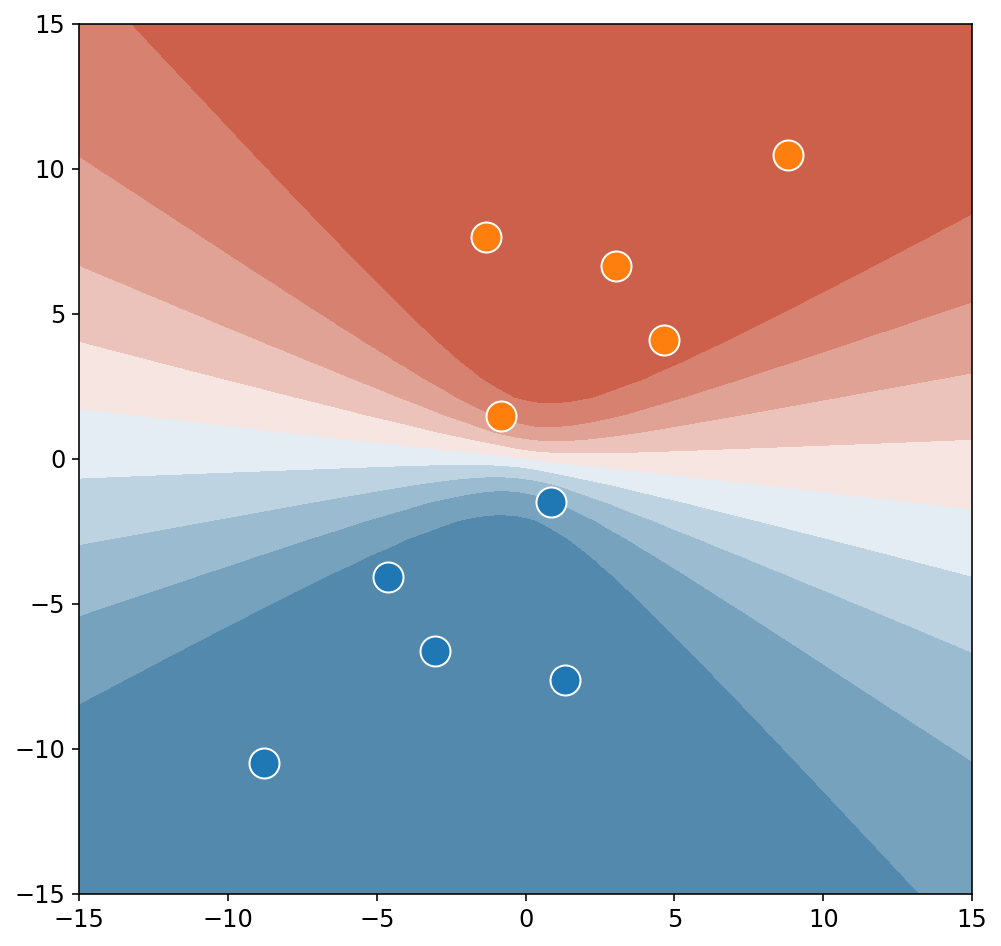

In [45]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(X1, X2, probas, cmap=cmap, levels=9)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
# cbar = plt.colorbar(contour, ax=ax)
# ax.set(xlabel='$x_1$', ylabel='$x_2$')
# cbar.ax.set_ylabel('Probability of $y=1$')
plt.show()

In [46]:
fig.savefig(f"/Users/omarfsosa/Desktop/logistic/average.pdf", box_inches="tight")

In [31]:
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)

In [48]:
for n in range(28):
    idx = np.random.randint(low=0, high=len(beta_samples))
    weights = beta_samples[idx]
    probas = logistic(grid @ weights.T).reshape(X1.shape)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    contour = ax.contourf(X1, X2, probas, cmap=cmap, levels=9)
    ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
    ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
    # cbar = plt.colorbar(contour, ax=ax)
    # ax.set(xlabel='$x_1$', ylabel='$x_2$')
    # cbar.ax.set_ylabel('Probability of $y=1$')
    fig.savefig(f"/Users/omarfsosa/Desktop/logistic/fig{n}.pdf", box_inches="tight")
    plt.clf()
    plt.close()
#     plt.show()

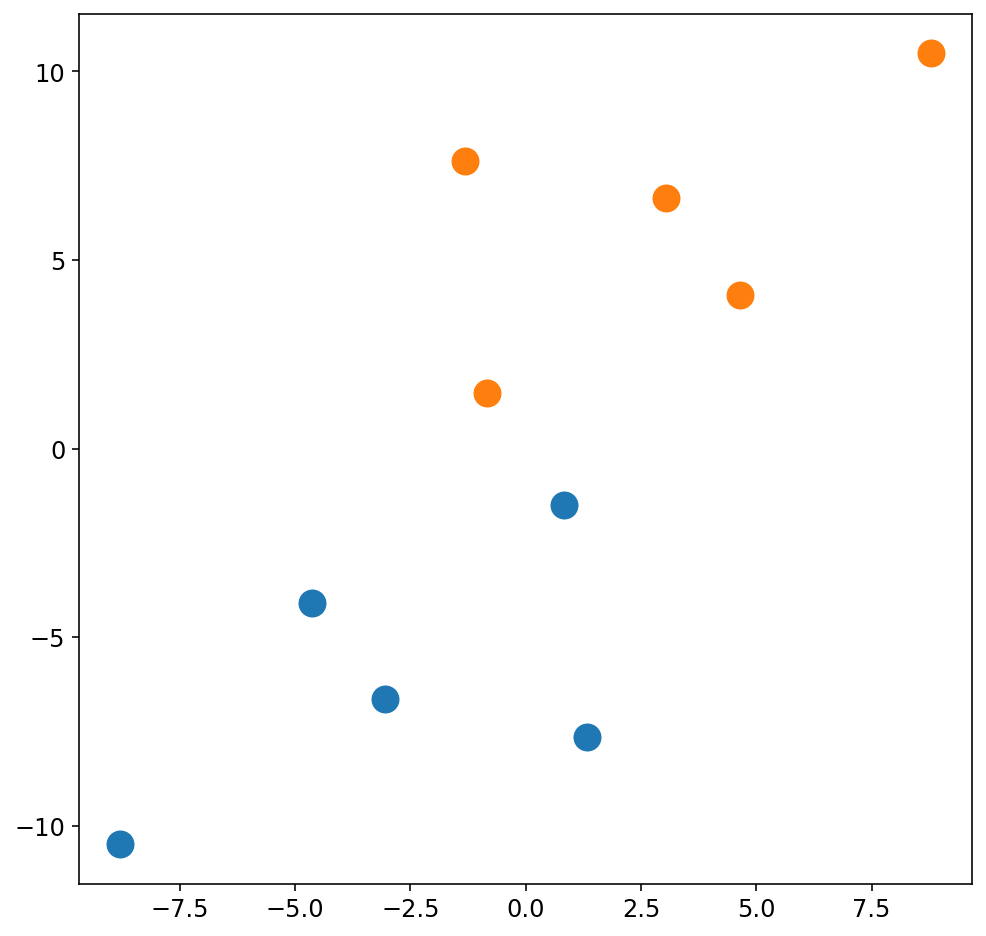

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
# contour = ax.contourf(X1, X2, probas, cmap=cmap, levels=9, alpha=0.2)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
ax.set_facecolor((0, 0, 0, 0))
# cbar = plt.colorbar(contour, ax=ax)
# ax.set(xlabel='$x_1$', ylabel='$x_2$')
# cbar.ax.set_ylabel('Probability of $y=1$')
fig.savefig(f"/Users/omarfsosa/Desktop/logistic/points.pdf", box_inches="tight")

In [52]:
n = 500
weights = beta_samples[:n]
probas = logistic(grid @ weights.T).mean(axis=1).reshape(X1.shape)

In [53]:
uncertainty = logistic(grid @ weights.T).std(axis=1).reshape(X1.shape)

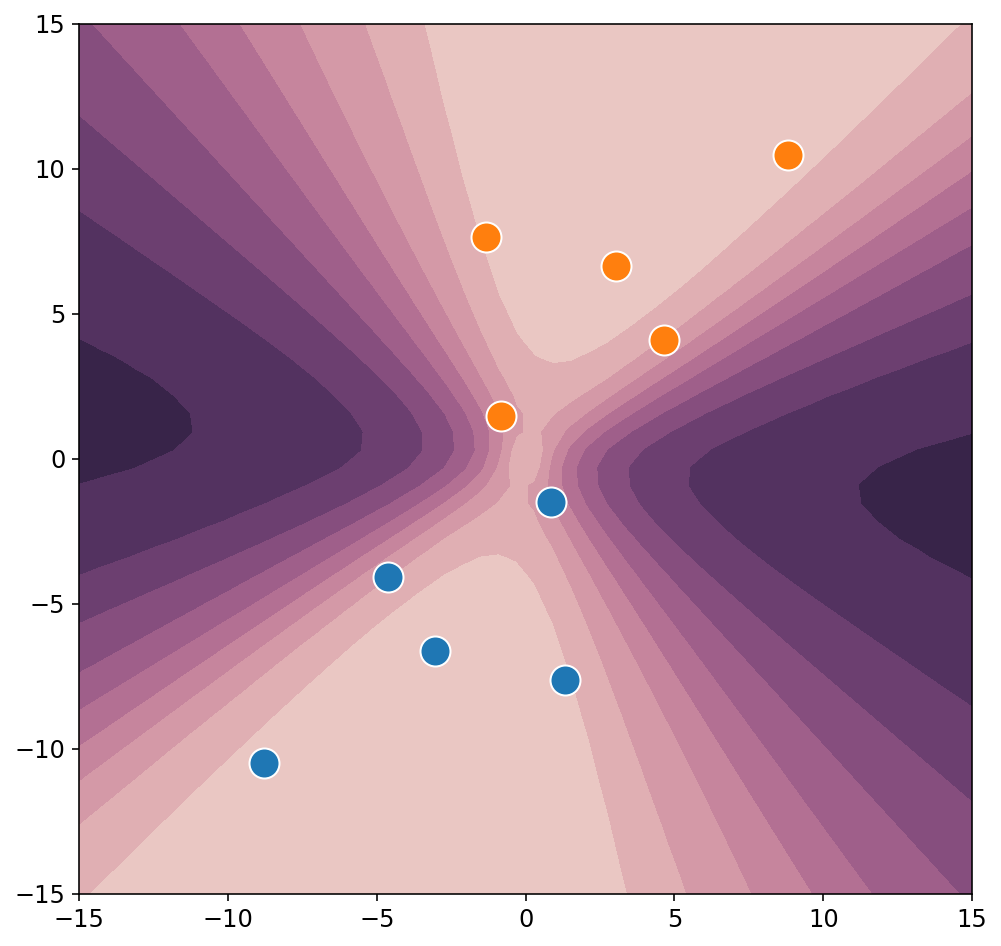

In [55]:
cmap = sns.cubehelix_palette(n_colors=3, as_cmap=True)
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(X1, X2, uncertainty, cmap=cmap, levels=9)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
# cbar = plt.colorbar(contour, ax=ax)
# ax.set(xlabel='$x_1$', ylabel='$x_2$')
# cbar.ax.set_ylabel("Posterior Std. Deviation")
plt.show()


In [56]:
fig.savefig(f"/Users/omarfsosa/Desktop/logistic/std.pdf", box_inches="tight")

In [126]:
X = X.round(2)

In [127]:
X

array([[  0.84,  -1.48],
       [ -4.64,  -4.08],
       [  1.32,  -7.64],
       [ -3.04,  -6.64],
       [ -8.8 , -10.48],
       [ -0.84,   1.48],
       [  4.64,   4.08],
       [ -1.32,   7.64],
       [  3.04,   6.64],
       [  8.8 ,  10.48]])

# Plotly

In [128]:
import plotly.graph_objects as go
import plotly.offline as py
import plotly.io as io
from plotly.subplots import make_subplots

In [129]:
cubehelix_cs = [
    [0.000, '#fcf9f7'],
    [0.166, '#edcfc9'],
    [0.333, '#daa2ac'],
    [0.500, '#bc7897'],
    [0.666, '#925684'],
    [0.833, '#5f3868'],
    [1.000, '#2d1e3e']
]

In [130]:
beta_samples.shape

(4000, 2)

In [133]:
from scipy.stats import gaussian_kde

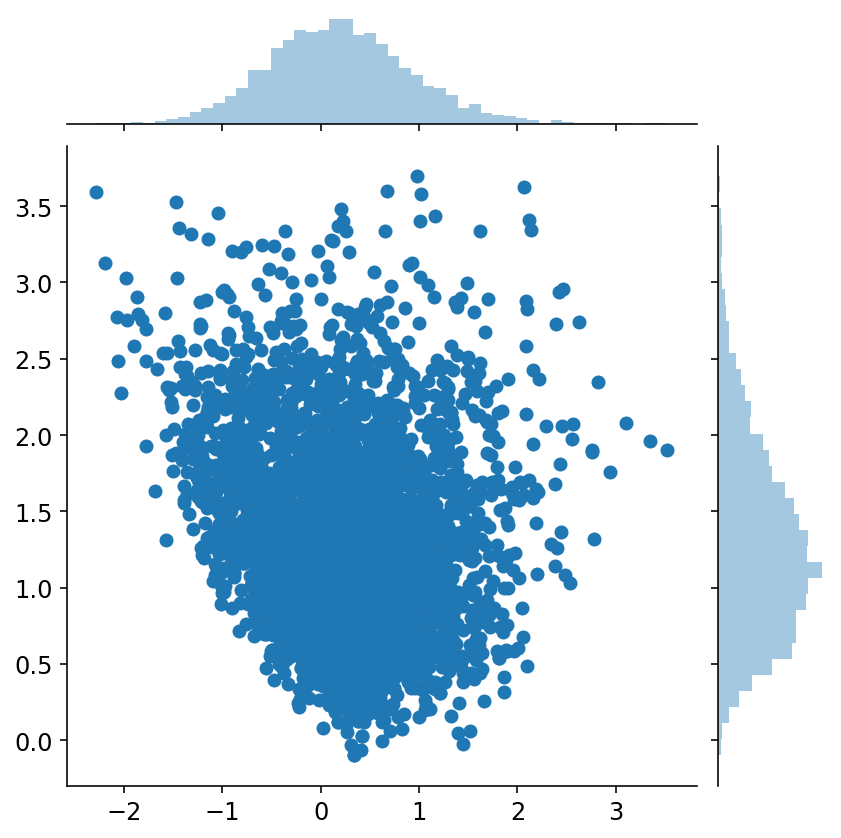

In [134]:
sns.jointplot(*beta_samples.T)

In [135]:
def kde_scipy(samples2d):
    
    kernel = gaussian_kde(samples2d.T)
    
    W0 = samples2d[:,0]
    W1 = samples2d[:,1]
    WX = np.linspace(W0.min(), W0.max(), 50)
    WY = np.linspace(W1.min(), W1.max(), 50)
    WXX, WYY = np.meshgrid(WX, WY)
    positions = np.vstack([WXX.ravel(), WYY.ravel()])
    Z = np.reshape(kernel(positions), WXX.shape)

    return [WX, WY, Z]

In [136]:
wx, wy, wz = kde_scipy(beta_samples)

In [137]:
wz = wz.clip(0.001, 0.999)

In [138]:
hovertemplate = (
    '<i>x1</i>: %{x:.2f}'
    '<br><i>x2</i>: %{y:.2f}'
    '<br><i>P(y=1 | W)</i>= %{z:.3f}<extra></extra>'
)

In [139]:
hovertemplate2 = (
    '<i>w1</i>: %{x:.2f}'
    '<br><i>w2</i>: %{y:.2f}'
    '<br><i>P(w | y)</i>= %{z:.3f}<extra></extra>'
)

In [140]:
hovertemplate3 = (
    '<i>w1</i>: %{x:.2f}'
    '<br><i>w2</i>: %{y:.2f}<extra></extra>'
)

In [27]:
# fig = go.FigureWidget(
#     make_subplots(
#         rows=1, cols=2,
#         specs=[[{"type": "xy"}, {"type": "xy"}]],
#         subplot_titles=("Data space", "Weights space",)
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x=X[:5,0].tolist(),
#         y=X[:5,1].tolist(),
#         mode='markers',
#         marker=dict(color="#3876AF", size=10, line=dict(color="#FFFFFF", width=1)),
#         name="y=0"
#     ),
#     row=1,
#     col=1,
# )


# fig.add_trace(
#     go.Scatter(
#         x=X[5:,0].tolist(),
#         y=X[5:,1].tolist(),
#         mode='markers',
#         marker=dict(color="#F08536", size=10, line=dict(color="#FFFFFF", width=1)),
#         name="y=1"
#     ),
#     row=1,
#     col=1,
# )


# fig.add_trace(
#     go.Contour(
#         x=np.linspace(-15, 15, 50).tolist(),
#         y=np.linspace(-15, 15, 50).tolist(),
#         z=clf_probas.clip(0.001, 0.999).tolist(),
#         colorscale=plotly_palette1,
#         showscale=False,
#         hovertemplate = hovertemplate
#     ),
#     row=1,
#     col=1,
# )



# fig.add_trace(
#     go.Contour(
#         x=wx.tolist(),
#         y=wy.tolist(),
#         z=wz.tolist(),
#         colorscale='Viridis',
#         colorbar=dict(
#             title=dict(
#                 text='Posterior probability P(w | x, y)',
#                 side="right",
#             ),
#         ),
#         hovertemplate=hovertemplate2,
#     ),
#     row=1,
#     col=2,
# )

# fig.add_trace(
#     go.Scatter(
#         x=[clf.coef_[0, 0]],
#         y=[clf.coef_[0, 1]],
#         mode='markers',
#         marker=dict(color="#F08536", size=10, line=dict(color="#FFFFFF", width=1)),
#         hovertemplate=hovertemplate3,
#     ),
#     row=1,
#     col=2,
# )

# fig.update_layout(height=500, showlegend=False)


# heatmap1 = fig.data[2]
# heatmap2 = fig.data[3]
# scatter = fig.data[4]

# def update_point(trace, points, selector):
# #     print("x =", points.xs)
# #     print("y =", points.ys)
#     w = [points.xs, points.ys]
#     if points.xs and points.ys:
#         with fig.batch_update():
#             heatmap1['z'] = logistic(grid @ w).reshape(X1.shape).clip(0.001, 0.999)
#             scatter['x'] = w[0]
#             scatter['y'] = w[1]

        
# heatmap2.on_click(update_point)

# fig.layout["xaxis"]["range"] = [-15, 15]
# fig.layout["yaxis"]["range"] = [-15, 15]
# fig.layout["xaxis"]["title_text"] = "x1"
# fig.layout["yaxis"]["title_text"] = "x2"
# fig.layout["xaxis2"]["title_text"] = "w1"
# fig.layout["yaxis2"]["title_text"] = "w2"


# fig

In [145]:
import json

In [146]:
with open("../assets/js/charts/heatmap.js", "w") as f:
    json.dump(fig.to_plotly_json(), f)

In [147]:
with open("../assets/js/charts/grid.js", "w") as f:
    json.dump(grid.tolist(), f)

In [26]:
# py.iplot(fig, filename="../assets/images/test.html")

In [49]:
with open("../assets/images/test.html", "w") as f:
    print(io.to_html(fig), file=f)

# Animation

In [341]:
# Animation
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['animation.ffmpeg_path'] = "/Users/omarfsosa/anaconda3/envs/stan/bin/ffmpeg"

In [343]:
n = 300
weights = beta_samples[:n]
probas = logistic(grid @ weights.T).mean(axis=1).reshape(X1.shape)
# contour = axes[0].contourf(X1, X2, probas, cmap=cmap)

In [346]:
mode = bayes_logistic_regression.optimizing(data=data)['beta']

/Users/omarfsosa/anaconda3/envs/stan/lib/python3.7/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'axes'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


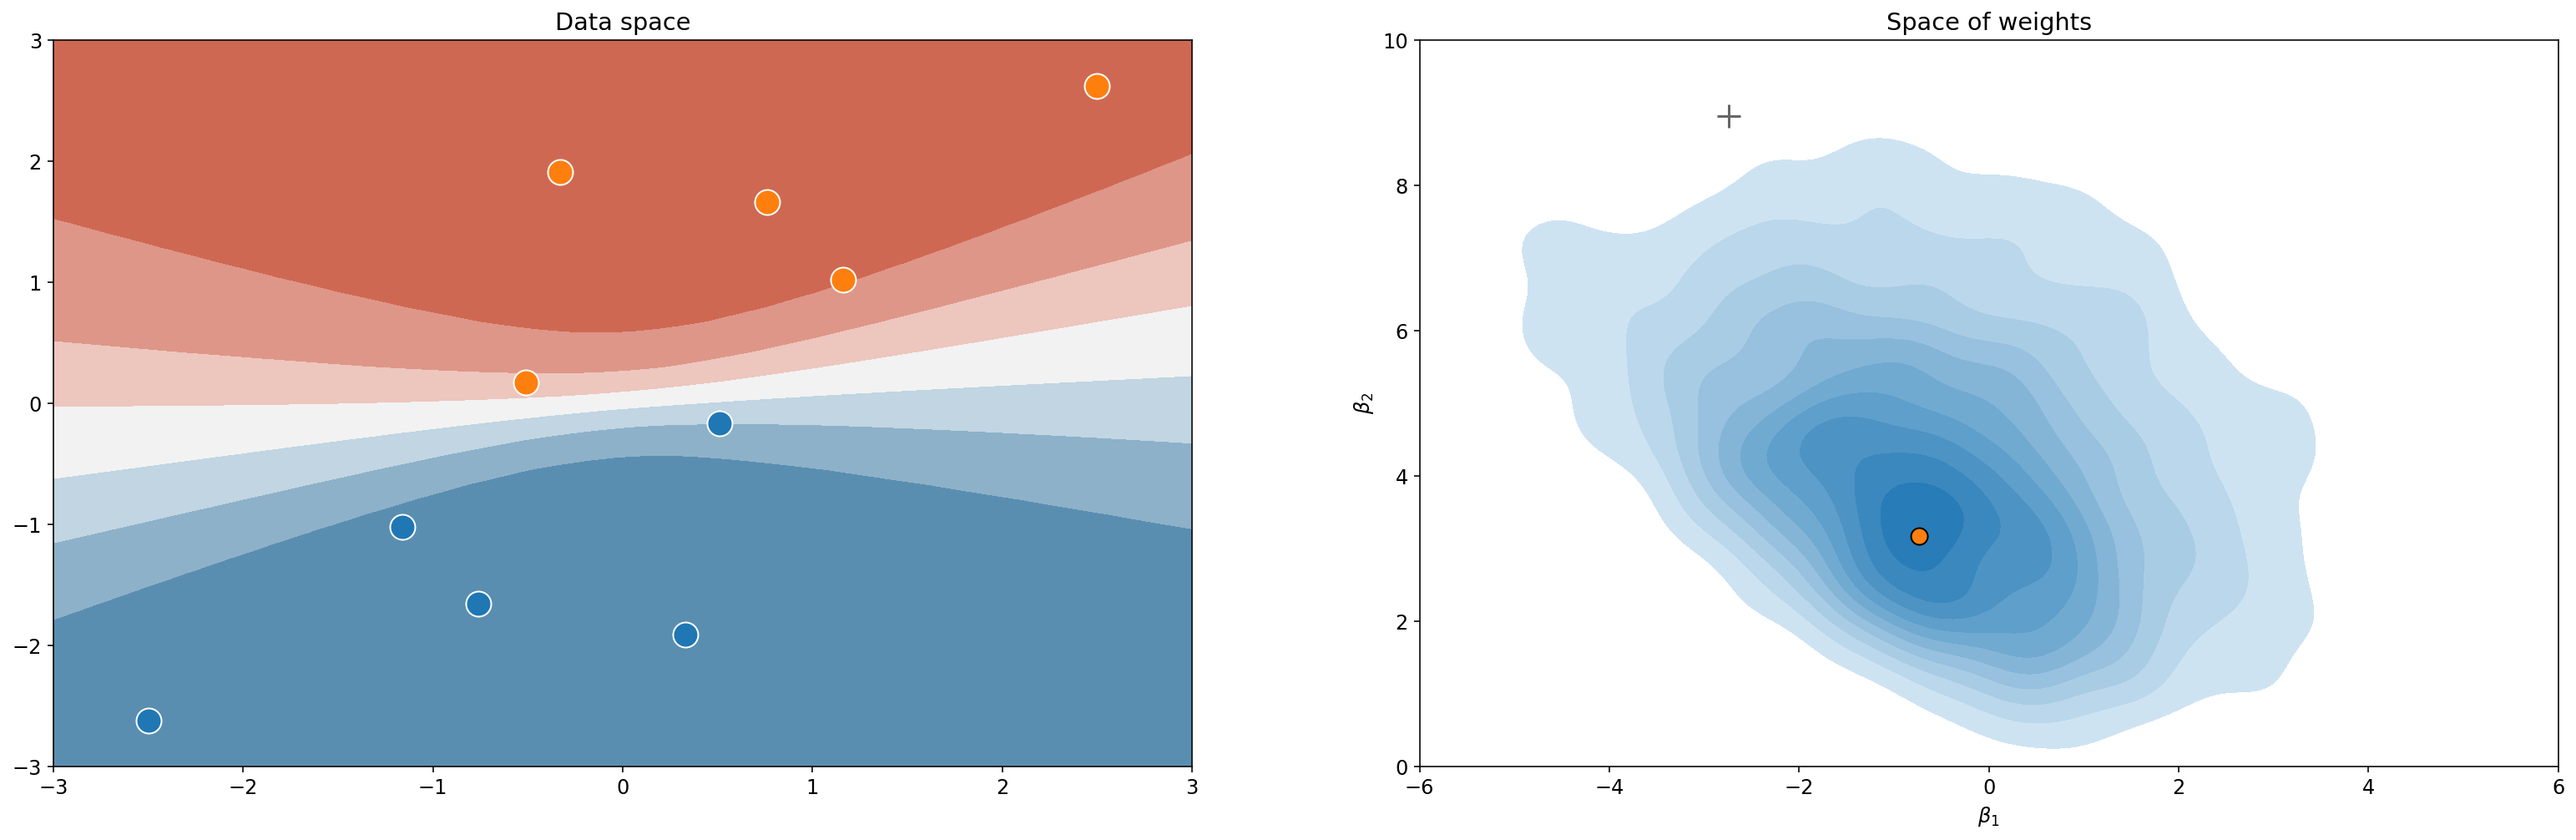

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(1 + 2 *8 * 1.618, 8))
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
contour = axes[0].contourf(X1, X2, probas, cmap=cmap, levels=9)

# Data Space
axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white', zorder=1)
axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white', zorder=1)
axes[0].set_xlim([-3, 3])
axes[0].set_ylim([-3, 3])
axes[0].set_title("Data space")

#
# Weights space
axes[1].set_xlabel("$\\beta_1$")
axes[1].set_ylabel("$\\beta_2$")
axes[1].set_ylim([0, 10])
axes[1].set_xlim([-6, 6])
axes[1].set_title("Space of weights")
sns.kdeplot(*beta_samples.T, shade=True, shade_lowest=False, gridsize=200, vertical=True, cbar=False, axes=axes[1])
axes[1].scatter(*mode, label="Mode", marker="o", s=100, c='C1', edgecolors="k")

## Plot samples in weight space
n_sample = 1
plot_samples = axes[1].scatter(*beta_samples[:n_sample].T, s=200, alpha=0.6, marker="+", color='k')

In [ ]:
# fig.savefig(f"/Users/omarfsosa/Documents/Projects/bayesian-statistics/resources/animation_sampling_{n}.pdf", bbox_inches="tight")

In [365]:
def init():
#     samples.set_offsets(np.c_[None])
    plot_samples.set_offsets(beta_samples[:n_sample + 1])
    weights = beta_samples[n_sample]
    probas = logistic(grid @ weights).reshape(X1.shape)
    contour.set_array(np.c_[X1, X2, probas])
    return (samples, contour)


# animation function. This is called sequentially
def animate(i):
    plot_samples.set_offsets(beta_samples[:n_sample + i])
    weights = beta_samples[n_sample + i - 1]
    probas = logistic(grid @ weights).reshape(X1.shape)

    contour = axes[0].contourf(X1, X2, probas, cmap=cmap)
    # Point A
#     axes[0].scatter(0.84, 0.54, marker="o", s=300, c='w', edgecolors="k")
# #     axes[0].annotate("A", (0.84, 0.54), xytext=(0.86, 0.56), color='w', size=20)

#     # Point B
#     axes[0].scatter(0.1, 0.6, marker="o", s=300, c='w', edgecolors="k")
# #     axes[0].annotate("B", (0.1, 0.6), xytext=(0.12, 0.62), color='w', size=20)


#     axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
#     axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
#     axes[0].set_xlim([-3, 3])
#     axes[0].set_ylim([-3, 3])
#     axes[0].set_title("Data space")

    return (samples, contour)

In [366]:
anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=np.arange(0, 100),
    interval=250,
#     blit=True
)

In [45]:
# HTML(anim.to_html5_video())

In [25]:
# HTML(anim.to_html5_video())

# anim.save(filename="./sampling_animation_contour.mp4", writer=animation.FFMpegWriter(), dpi=500)

# Posterior updates


In [44]:
X[:0]

array([], shape=(0, 2), dtype=float64)

In [45]:
for n in range(len(X)):
    x = X[:n]
    data = {
        "N": x.shape[0],
        "D": x.shape[1],
        "X": x,
        "y": y[:n],
    }
    break

In [46]:
samples = bayes_logistic_regression.sampling(data=data)

RuntimeError: Exception: multiply: m1 must have a positive size, but is 0; dimension size expression = rows()  (in 'unknown file name' at line 15)


In [51]:
# beta_samples = samples.extract()['beta']
beta_samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=10_000)

In [48]:
probas = logistic(grid @ np.array([[-0.001, -0.001]]).T).mean(axis=1).reshape(X1.shape)
probas

array([[0.50749944, 0.50734641, 0.50719338, ..., 0.50030612, 0.50015306,
        0.5       ],
       [0.50734641, 0.50719338, 0.50704035, ..., 0.50015306, 0.5       ,
        0.49984694],
       [0.50719338, 0.50704035, 0.50688732, ..., 0.5       , 0.49984694,
        0.49969388],
       ...,
       [0.50030612, 0.50015306, 0.5       , ..., 0.49311268, 0.49295965,
        0.49280662],
       [0.50015306, 0.5       , 0.49984694, ..., 0.49295965, 0.49280662,
        0.49265359],
       [0.5       , 0.49984694, 0.49969388, ..., 0.49280662, 0.49265359,
        0.49250056]])

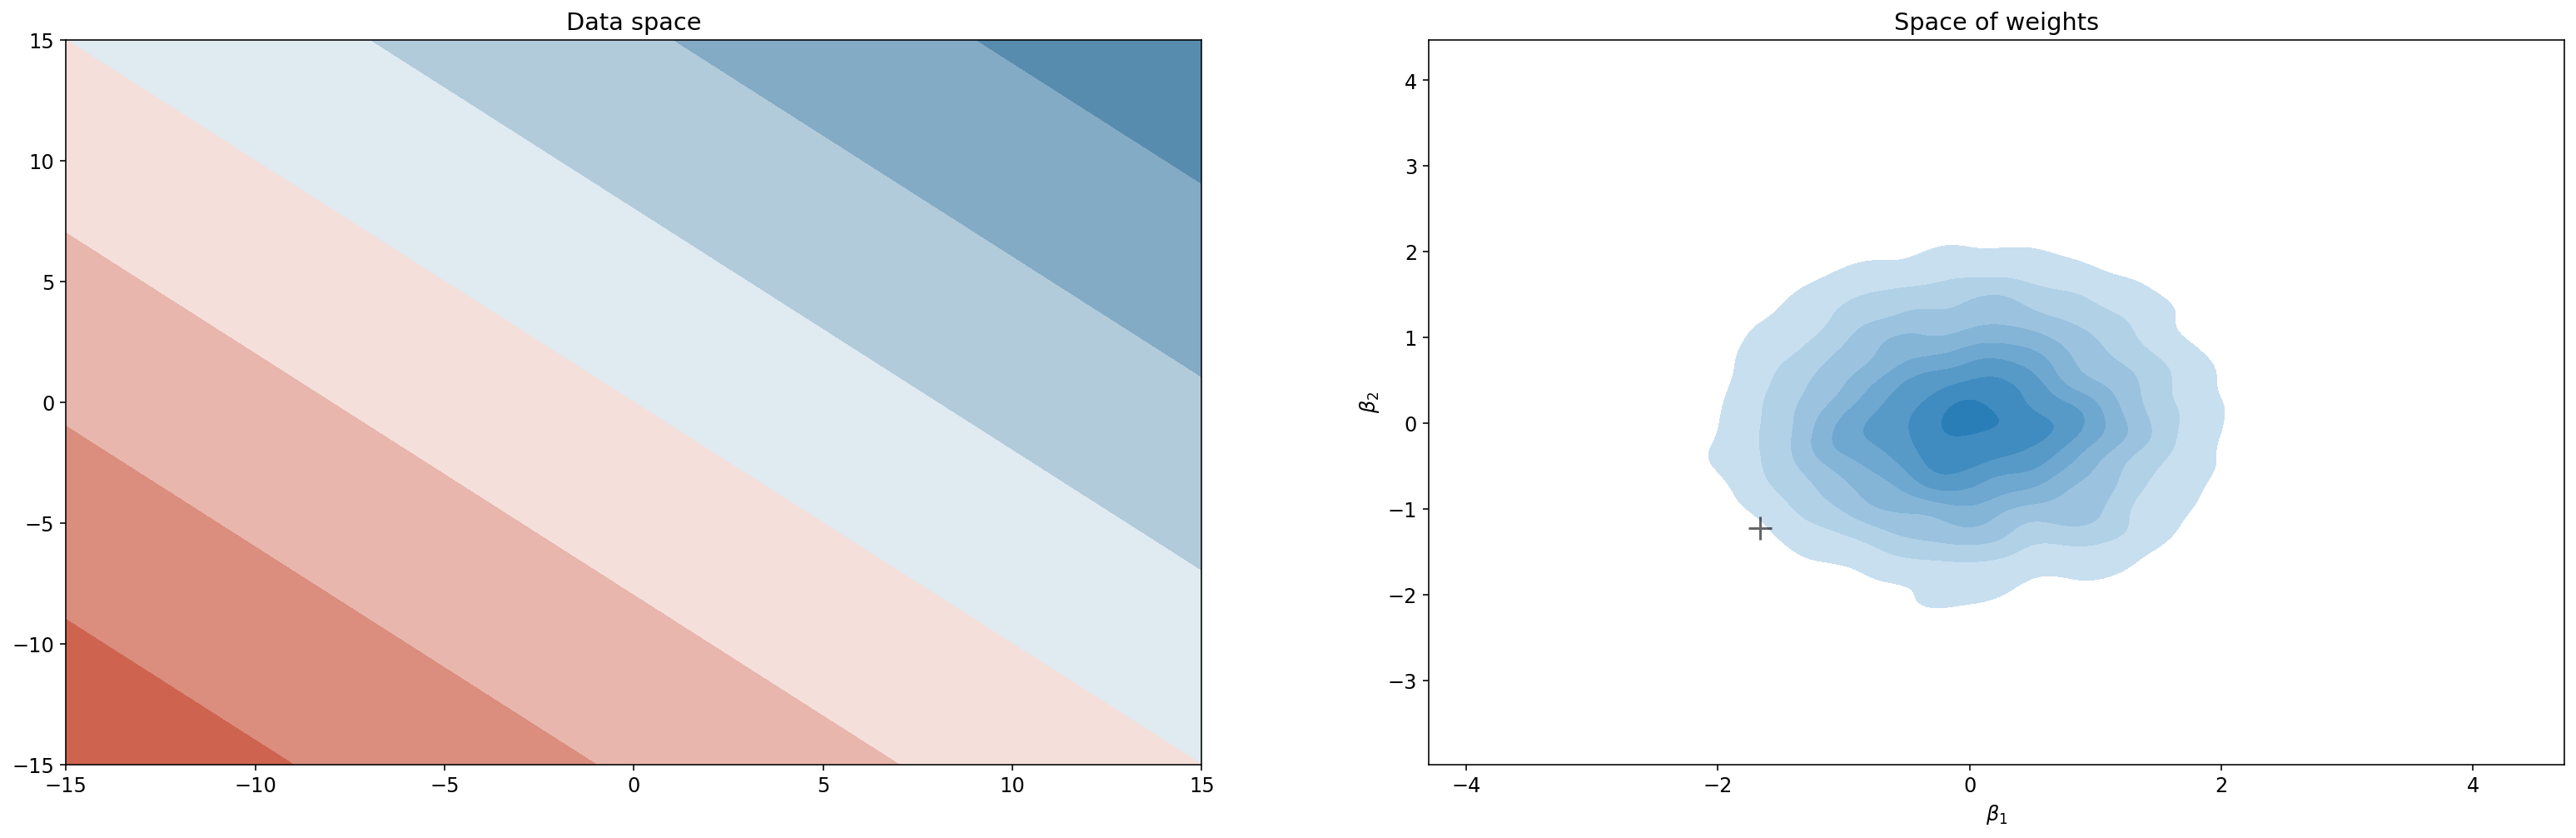

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(1 + 2 *8 * 1.618, 8))
cmap = sns.diverging_palette(237, 18, s=75, l=50, as_cmap=True)
contour = axes[0].contourf(X1, X2, probas, cmap=cmap)

# Data Space
# axes[0].plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white', zorder=1)
# axes[0].plot(*X[5:].T, "o", markersize=15, markeredgecolor='white', zorder=1)
# axes[0].set_xlim([-3, 3])
# axes[0].set_ylim([-3, 3])
axes[0].set_title("Data space")

#
# Weights space
axes[1].set_xlabel("$\\beta_1$")
axes[1].set_ylabel("$\\beta_2$")
# axes[1].set_ylim([0, 10])
# axes[1].set_xlim([-6, 6])
axes[1].set_title("Space of weights")
sns.kdeplot(*beta_samples.T, shade=True, shade_lowest=False, gridsize=300, vertical=True, cbar=False, axes=axes[1])
# axes[1].scatter(*mode, label="Mode", marker="o", s=100, c='C1', edgecolors="k")

## Plot samples in weight space
n_sample = 1
plot_samples = axes[1].scatter(*beta_samples[:n_sample].T, s=200, alpha=0.6, marker="+", color='k')

In [ ]:
cmap = sns.cubehelix_palette(n_colors=3, as_cmap=True)
fig, ax = plt.subplots(figsize=(14, 8))
contour = ax.contourf(X1, X2, uncertainty, cmap=cmap, levels=9)
ax.plot(*X[:5].T, 'o', markersize=15, markeredgecolor='white')
ax.plot(*X[5:].T, "o", markersize=15, markeredgecolor='white')
cbar = plt.colorbar(contour, ax=ax)
ax.set(xlabel='$x_1$', ylabel='$x_2$')
cbar.ax.set_ylabel("Posterior Std. Deviation")
plt.show()
